In [47]:
import numpy as np
import scipy
import librosa.display
import librosa

In [54]:
def display_linear_frequency_spectogram(filename, num_samples=5000):
    x, rate = librosa.load(filename)
    x = x[:num_samples]
    
    D = librosa.amplitude_to_db(librosa.stft(x), ref=np.max)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Linear-frequency power spectogram')
    plt.show()

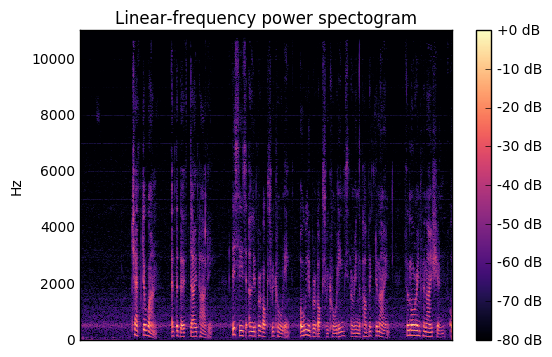

In [66]:
display_linear_frequency_spectogram('./working_data/optic_10.wav', 300000)